In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

url = "https://raw.githubusercontent.com/fabiobanyu/File_Tugas/refs/heads/main/Analisis%20Kebiasaan%20Mahasiswa%20tidak%20Memakai%20Helm%20Saat%20Berkendara%20(Responses)%20-%20Form%20Responses.csv"

data_cleaned = pd.read_csv(url)
data_cleaned = data_cleaned.dropna()

print(tabulate(data_cleaned.head(), headers='keys', tablefmt='pretty'))
print(tabulate(data_cleaned.tail(), headers='keys', tablefmt='pretty'))

+---+-----------------------------+-----------+-----------+----------------+-------------------------------------------------------------+------------------------------------------------------------+---------------------------------------------------------+
|   |        Nama Lengkap         | Institusi |  Gender   | Tempat Tinggal | Apakah tidak memakai helm termasuk pelanggaran lalu lintas? | Apakah anda pernah tidak menggunakan helm saat berkendara? | Apa alasan anda tidak menggunakan helm saat berkendara? |
+---+-----------------------------+-----------+-----------+----------------+-------------------------------------------------------------+------------------------------------------------------------+---------------------------------------------------------+
| 0 |       Muhammad Ridwan       |   ITERA   | Laki-laki |  Luar Daerah   |                             Ya                              |                             Ya                             |                          M

In [2]:
data_cleaned.describe()

,Nama Lengkap,Institusi,Gender,Tempat Tinggal,Apakah tidak memakai helm termasuk pelanggaran lalu lintas?,Apakah anda pernah tidak menggunakan helm saat berkendara?,Apa alasan anda tidak menggunakan helm saat berkendara?
count,55,55,55,55,55,55,55
unique,55,3,2,2,2,2,9
top,Muhammad Ridwan,ITERA,Laki-laki,Warga Lokal,Ya,Ya,Malas
freq,1,46,31,30,54,48,22


In [3]:
# Select the relevant columns
questions = data_cleaned.iloc[:, 4:6]

# Count 'Ya' and 'Tidak' for each column
yes_no_counts = questions.apply(lambda x: x.value_counts())

# Calculate the average proportion of 'Ya' responses for each question
yes_proportions = yes_no_counts.loc['Ya'] / yes_no_counts.sum()

# Format the output into a more readable DataFrame
formatted_output = yes_no_counts.copy()
formatted_output.loc["Proporsi 'Ya'"] = yes_proportions

# Rename index for better readability
formatted_output.rename(index={"Ya": "Jumlah 'Ya'", "Tidak": "Jumlah 'Tidak'"}, inplace=True)

formatted_output


,Apakah tidak memakai helm termasuk pelanggaran lalu lintas?,Apakah anda pernah tidak menggunakan helm saat berkendara?
Jumlah 'Ya',54.000000,48.000000
Jumlah 'Tidak',1.000000,7.000000
Proporsi 'Ya',0.981818,0.872727


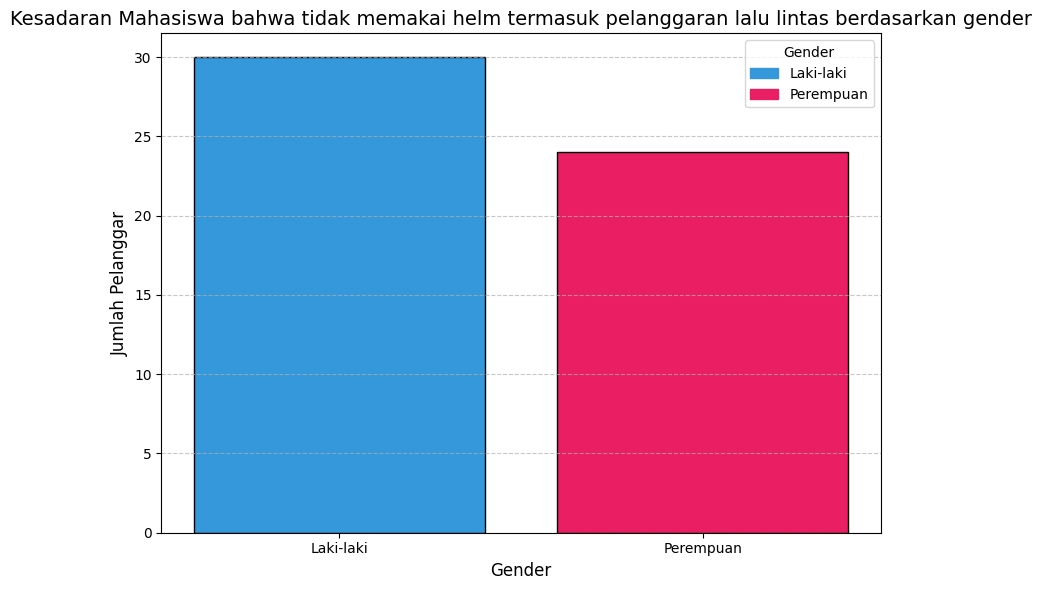

In [4]:
gender_col = 'Gender'
pelanggar_col = 'Apakah tidak memakai helm termasuk pelanggaran lalu lintas?'

gender_pelanggar = data_cleaned.groupby(gender_col)[pelanggar_col].value_counts().unstack()

if 'Ya' in gender_pelanggar.columns:
    gender_pelanggar = gender_pelanggar['Ya']

colors = ['#3498db' if gender == 'Laki-laki' else '#e91e63' for gender in gender_pelanggar.index]

# Membuat barplot
plt.figure(figsize=(8, 6))
plt.bar(gender_pelanggar.index, gender_pelanggar.values, color=colors, edgecolor='black')
plt.title('Kesadaran Mahasiswa bahwa tidak memakai helm termasuk pelanggaran lalu lintas berdasarkan gender', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Jumlah Pelanggar', fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Membuat legenda manual
handles = [plt.Rectangle((0, 0), 1, 1, color='#3498db'), plt.Rectangle((0, 0), 1, 1, color='#e91e63')]
plt.legend(handles, ['Laki-laki', 'Perempuan'], title='Gender', fontsize=10)

plt.tight_layout()
plt.show()

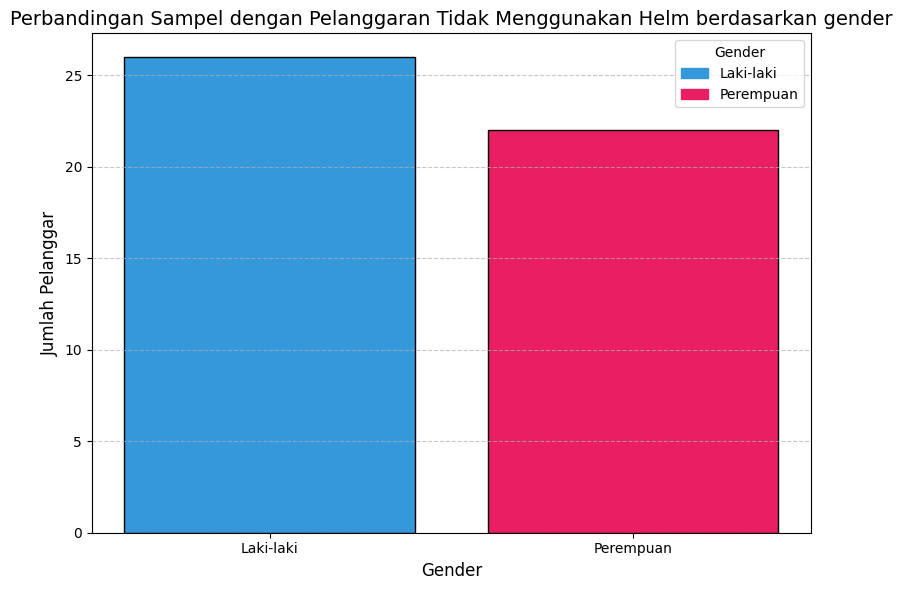

In [5]:
gender_col = 'Gender'
pelanggar_col = 'Apakah anda pernah tidak menggunakan helm saat berkendara?'

gender_pelanggar = data_cleaned.groupby(gender_col)[pelanggar_col].value_counts().unstack()

if 'Ya' in gender_pelanggar.columns:
    gender_pelanggar = gender_pelanggar['Ya']

colors = ['#3498db' if gender == 'Laki-laki' else '#e91e63' for gender in gender_pelanggar.index]

# Membuat barplot
plt.figure(figsize=(8, 6))
plt.bar(gender_pelanggar.index, gender_pelanggar.values, color=colors, edgecolor='black')
plt.title('Perbandingan Sampel dengan Pelanggaran Tidak Menggunakan Helm berdasarkan gender', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Jumlah Pelanggar', fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Membuat legenda manual
handles = [plt.Rectangle((0, 0), 1, 1, color='#3498db'), plt.Rectangle((0, 0), 1, 1, color='#e91e63')]
plt.legend(handles, ['Laki-laki', 'Perempuan'], title='Gender', fontsize=10)

plt.tight_layout()
plt.show()

Index(['Luar Daerah', 'Warga Lokal'], dtype='object', name='Tempat Tinggal')


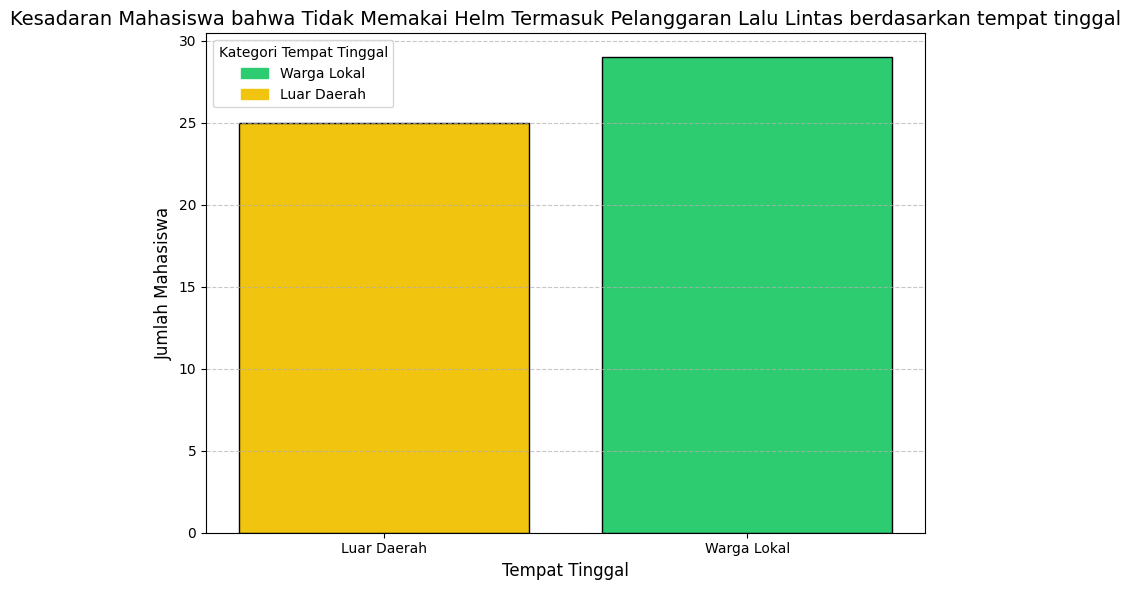

In [6]:
# Kolom yang relevan
Tempat_tinggal_col = 'Tempat Tinggal'  # Nama kolom tempat tinggal
pelanggar_col = 'Apakah tidak memakai helm termasuk pelanggaran lalu lintas?'

# Mengelompokkan data berdasarkan tempat tinggal dan pelanggaran
Tempat_tinggal_pelanggar = data_cleaned.groupby(Tempat_tinggal_col)[pelanggar_col].value_counts().unstack()

# Fokus pada kolom 'Ya' untuk pelanggaran
if 'Ya' in Tempat_tinggal_pelanggar.columns:
    Tempat_tinggal_pelanggar = Tempat_tinggal_pelanggar['Ya']

# Memastikan tidak ada masalah nama kategori
print(Tempat_tinggal_pelanggar.index)

# Warna berdasarkan kategori tempat tinggal
colors = ['#2ecc71' if 'lokal' in tempat.lower() else '#f1c40f' for tempat in Tempat_tinggal_pelanggar.index]

# Membuat barplot
plt.figure(figsize=(8, 6))
plt.bar(Tempat_tinggal_pelanggar.index, Tempat_tinggal_pelanggar.values, color=colors, edgecolor='black')
plt.title('Kesadaran Mahasiswa bahwa Tidak Memakai Helm Termasuk Pelanggaran Lalu Lintas berdasarkan tempat tinggal', fontsize=14)
plt.xlabel('Tempat Tinggal', fontsize=12)
plt.ylabel('Jumlah Mahasiswa', fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Membuat legenda manual
handles = [
    plt.Rectangle((0, 0), 1, 1, color='#2ecc71'),
    plt.Rectangle((0, 0), 1, 1, color='#f1c40f')
]
plt.legend(handles, ['Warga Lokal', 'Luar Daerah'], title='Kategori Tempat Tinggal', fontsize=10)

plt.tight_layout()
plt.show()

Index(['Luar Daerah', 'Warga Lokal'], dtype='object', name='Tempat Tinggal')


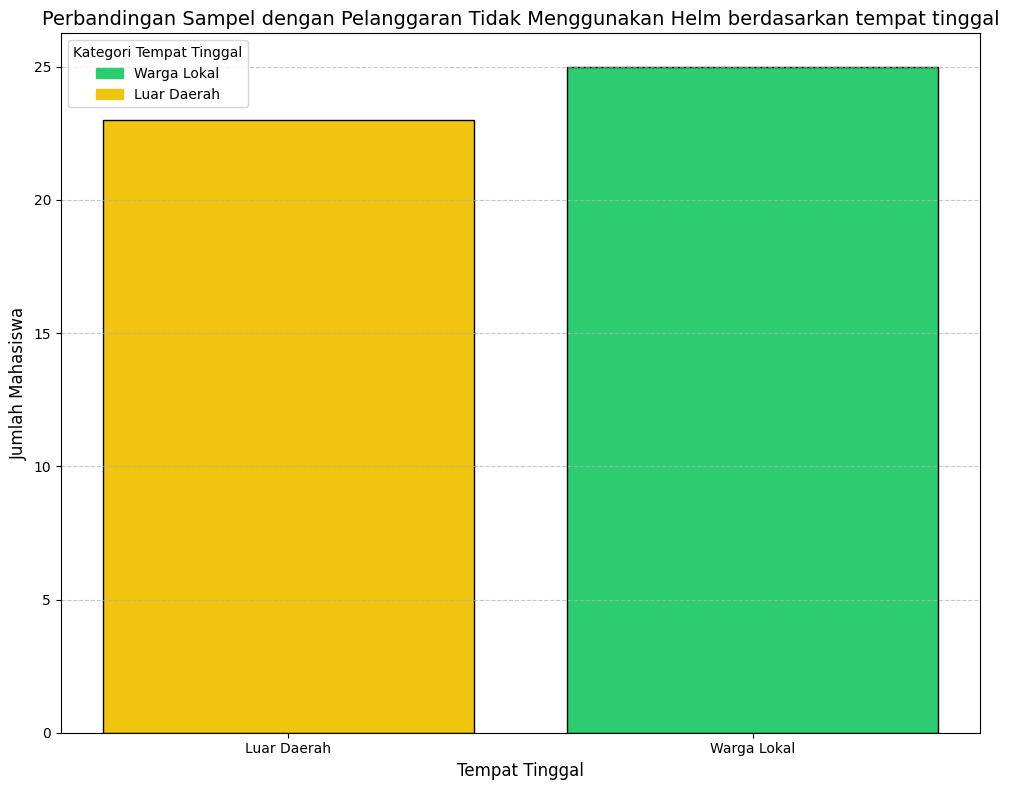

In [7]:
# Kolom yang relevan
Tempat_tinggal_col = 'Tempat Tinggal'
pelanggar_col = 'Apakah anda pernah tidak menggunakan helm saat berkendara?'

Tempat_tinggal_pelanggar = data_cleaned.groupby(Tempat_tinggal_col)[pelanggar_col].value_counts().unstack()

if 'Ya' in Tempat_tinggal_pelanggar.columns:
    Tempat_tinggal_pelanggar = Tempat_tinggal_pelanggar['Ya']

print(Tempat_tinggal_pelanggar.index)

colors = ['#2ecc71' if 'lokal' in tempat.lower() else '#f1c40f' for tempat in Tempat_tinggal_pelanggar.index]

plt.figure(figsize=(10, 8))
plt.bar(Tempat_tinggal_pelanggar.index, Tempat_tinggal_pelanggar.values, color=colors, edgecolor='black')
plt.title('Perbandingan Sampel dengan Pelanggaran Tidak Menggunakan Helm berdasarkan tempat tinggal', fontsize=14)
plt.xlabel('Tempat Tinggal', fontsize=12)
plt.ylabel('Jumlah Mahasiswa', fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

handles = [
    plt.Rectangle((0, 0), 1, 1, color='#2ecc71'),
    plt.Rectangle((0, 0), 1, 1, color='#f1c40f')
]
plt.legend(handles, ['Warga Lokal', 'Luar Daerah'], title='Kategori Tempat Tinggal', fontsize=10)

plt.tight_layout()
plt.show()

C:\Users\Fabio\AppData\Local\Temp\ipykernel_16116\4071266227.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=reason_counts.index, y=reason_counts.values, palette='viridis')


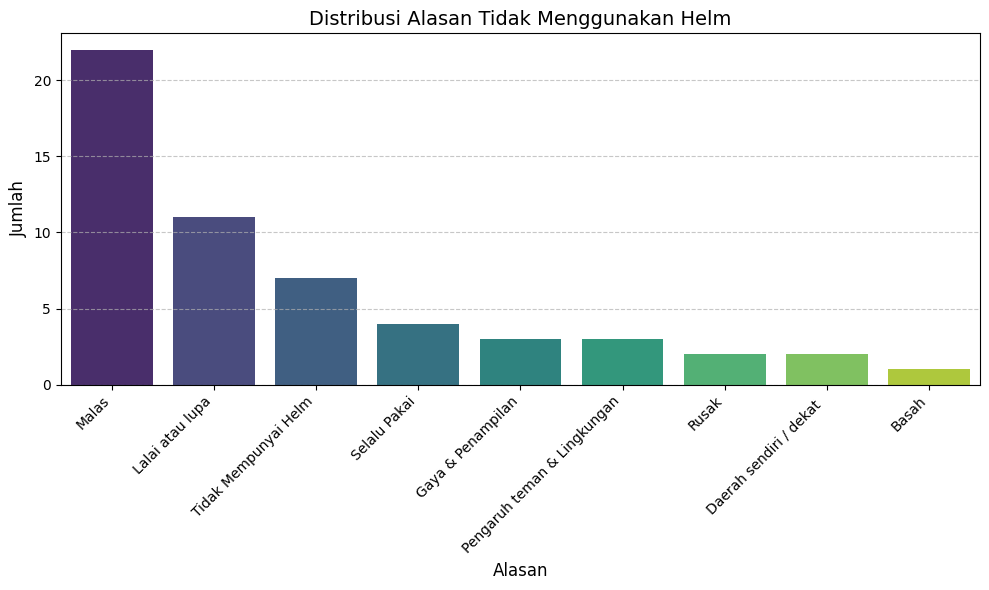

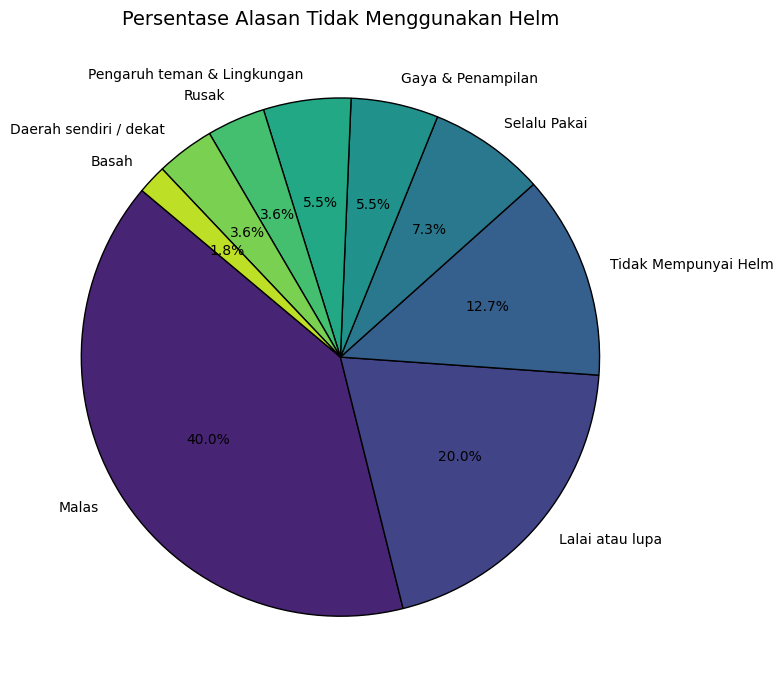

In [8]:
# Pilih kolom yang relevan
reason_col = "Apa alasan anda tidak menggunakan helm saat berkendara?"  # Nama kolom

# Hitung jumlah setiap kategori
reason_counts = data_cleaned[reason_col].value_counts()

# Barplot
plt.figure(figsize=(10, 6))
sns.barplot(x=reason_counts.index, y=reason_counts.values, palette='viridis')
plt.title('Distribusi Alasan Tidak Menggunakan Helm', fontsize=14)
plt.xlabel('Alasan', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(
    reason_counts.values,
    labels=reason_counts.index,
    autopct='%1.1f%%',
    colors=sns.color_palette('viridis', len(reason_counts)),
    startangle=140,
    wedgeprops={'edgecolor': 'black'}
)
plt.title('Persentase Alasan Tidak Menggunakan Helm', fontsize=14)
plt.tight_layout()
plt.show()